In [7]:
import numpy as np
import torch as tc
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from evaluate

# Program 1

Program 1 returns "sample2"

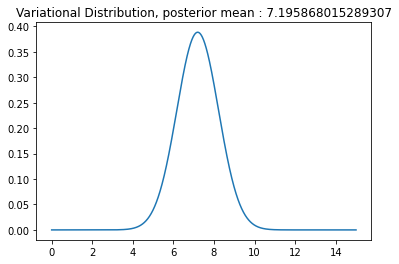

In [36]:
with open("./results/Q_1.pkl", "rb") as f:
    Q = pickle.load(f)
    
x = tc.linspace(0, 15, 10000)
plt.plot(x, Q["sample2"].log_prob(x).exp().detach())
plt.title("Variational Distribution, posterior mean : {}".format(Q["sample2"].loc));

# Program 2

In [40]:
with open("./results/Q_2.pkl", "rb") as f:
    Q = pickle.load(f)

print("Slope's posterior mean : {}".format(Q["sample1"].loc))
print("Bias's posterior mean : {}".format(Q["sample2"].loc))
print("Predictive distribution at 10.0 : {}".format(Q["sample1"].loc * 10.0 + Q["sample2"].loc))

Slope's posterior mean : 2.0302135944366455
Bias's posterior mean : -0.20423227548599243
Predictive distribution at 10.0 : 20.097902297973633


# Program 3

In [53]:
with open("./results/Q_3.pkl", "rb") as f:
    Q = pickle.load(f)

N = 10000
tc.stack([Q["sample7"].sample() == Q["sample9"].sample() for _ in range(N)]).float().mean()

tensor(0.3373)

# Program 4

# Program 5

In [54]:
with open("./results/Q_5.pkl", "rb") as f:
    Q = pickle.load(f)

In [66]:
low, high = Q["sample2"].low.clone().detach(), Q["sample2"].high.clone().detach()

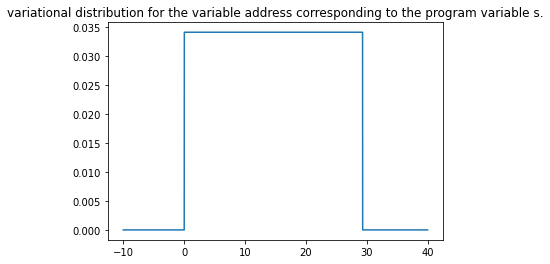

In [90]:
x = tc.arange(-10, 40, step=0.01)
y = []
for x_val in x:
    if x_val <= low or x_val >= high:
        y.append(tc.tensor(0.0))
    else:
        y.append(Q["sample2"].log_prob(x_val).exp())

y = tc.stack(y).clone().detach().numpy()
plt.plot(x,y)
plt.title("variational distribution for the variable address corresponding to the program variable s.");